#Analysis of Controversial Comments in Reddit

###By Brendan Cruz Colon

###Geographical distribution of controversial comments on Reddit across US States

This mini project will be an examination of the abundance of controversial comments in Reddit. I will be looking at state and major city subreddits. 

In [1]:
import pandas as pd
from collections import Counter
from __future__ import division

To do this, I'll need the abbreviation of each state, it's name, and its corresponding subreddit. I'll list these below.

In [2]:
state_subreddits = ['texas', 'california', 'newjersey', 'michigan', 'minnesota', 'colorado', 'wisconsin', 'florida',
                    'connecticut', 'oregon', 'ohio', 'hawaii', 'northcarolina', 'oklahoma', 'maryland', 'arizona',
                    'virginia', 'maine', 'indiana', 'iowa', 'washington', 'newhampshire', 'alaska', 'louisiana',
                    'massachusetts', 'vermont', 'newyork', 'arkansas', 'pennsylvania', 'alabama', 'kentucky',
                    'southcarolina', 'georgia', 'montana', 'delaware', 'utah', 'rhodeisland','missouri', 'tennessee',
                    'nebraska', 'illinois', 'westvirginia', 'newmexico', 'mississippi', 'kansas', 'northdakota',
                    'idaho', 'southdakota', 'wyoming', 'nevada']

state_abbreviations = ['TX', 'CA', 'NJ', 'MI', 'MN', 'CO', 'WI', 'FL', 'CT', 'OR', 'OH', 'HI', 'NC', 'OK', 'MD',
                       'AZ', 'VA', 'ME', 'IN', 'IA', 'WA', 'NH', 'AK', 'LA', 'MA', 'VT', 'NY', 'AR', 'PA', 'AL', 
                       'KY', 'SC', 'GA', 'MT', 'DE', 'UT', 'RI', 'MO', 'TN', 'NE', 'IL', 'WV', 'NM', 'MS', 'KS', 
                       'ND', 'ID', 'SD', 'WY', 'NV']

state_name = ['Texas', 'California', 'New Jersey', 'Michigan', 'Minnesota', 'Colorado', 'Wisconsin', 'Florida',
              'Connecticut', 'Oregon', 'Ohio', 'Hawaii', 'North Carolina', 'Oklahoma', 'Maryland', 'Arizona',
              'Virginia', 'Maine', 'Indiana', 'Iowa', 'Washington', 'New Hampshire', 'Alaska', 'Louisiana',
              'Massachusetts', 'Vermont', 'New York', 'Arkansas', 'Pennsylvania', 'Alabama', 'Kentucky',
              'South Carolina', 'Georgia', 'Montana', 'Delaware', 'Utah', 'Rhode Island', 'Missouri',
              'Tennessee', 'Nebraska', 'Illinois', 'West Virginia', 'New Mexico', 'Mississippi', 'Kansas',
              'North Dakota', 'Idaho', 'South Dakota', 'Wyoming', 'Nevada']

states_abbrev = {'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona',
                 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia',
                 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa',
                 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana',
                 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota',
                 'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana',
                 'NA': 'National', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
                 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York',
                 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico',
                 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas',
                 'UT': 'Utah', 'VA': 'Virginia', 'VI': 'Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington',
                 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming'}

I then retrieved every comment from every one of these subreddits available on the Google Bigquery at the below link.

https://bigquery.cloud.google.com/dataset/fh-bigquery:reddit_comments

I purposely also scraped the retrieved_on column because the controversiality score wasn't added at Reddit's inception. If I look at the total dataset I'll bias the percentage of controversial comments. To remove most of this bias, I'll find the first indication of a controversial comment and then use all the data that occurs after that date. 

In [3]:
state_comments = pd.read_csv('state_comments.csv') #load all comments in all state-based subreddits
print state_comments.columns

Index([u'subreddit', u'controversiality', u'created_utc'], dtype='object')


This will the master function for deciphering the abundance of comments marked as controversial. Essentailly, given a .csv file it will turn it into a pandas dataframe containing the percent of comments marked as controversial. 

In [4]:
def find_controversial_comments(reddit_df, category_list, state_index, cutoff_date):
    '''Given a dataframe containing comment info, will pull out % of controversial comments given some start date'''
    ###pull out information given some start date, in this case it will be when controversiality become a metric
    reddit_df = reddit_df[reddit_df['created_utc'] > cutoff_date]
    category_lowercase = []
    for category in reddit_df['subreddit'].tolist():
        category_lowercase.append( category.lower() )
    reddit_df['subreddit'] = category_lowercase
    
    ###collect data on controversial comments
    controversial_tally = Counter(reddit_df['subreddit'][reddit_df['controversiality'] == 1])
    benign_tally = Counter(reddit_df['subreddit'][reddit_df['controversiality'] == 0])
    total_comments = controversial_tally + benign_tally
    
    category_controversiality = []
    comment_count = []
    
    for category in category_list:
        comment_count.append( total_comments.get(category) )
        if controversial_tally.get(category) != None:
            category_controversiality.append(controversial_tally.get(category)/(controversial_tally.get(category)
                                             + benign_tally.get(category)))
        else:
            category_controversiality.append(0)
    
    if state_index != None:
        category_df = pd.DataFrame({'subreddit': category_list, 
                                    'Average Controversial Comment': [x * 100 for x in category_controversiality],
                                    'Total Comments': comment_count}, index=state_index)
    else:
        category_df = pd.DataFrame({'subreddit': category_list, 
                            'Average Controversial Comment': [x * 100 for x in category_controversiality],
                            'Total Comments': comment_count})
    return category_df, reddit_df

So the date that controversial comments were added to reddit was June 2014. The date in unix code is 1403673915 so we'll just use this from now on. 

In [5]:
state_comment_df, state_comments = find_controversial_comments(state_comments, state_subreddits, state_name, 1403673915)

/Users/Brendan/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead


Alright, let's see how it looks. 

In [52]:
state_comment_df.head(5)

,Average Controversial Comment,Total Comments,subreddit
Texas,4.569717,131518,texas
California,4.004007,74875,california
New Jersey,2.251743,121195,newjersey
Michigan,3.694500,72838,michigan
Minnesota,5.072937,71911,minnesota


Excellent. Now time to plot. I'll borrow and modify some scripts from the Harvard Data Science course for making the chloropleth. 

In [7]:
#adapted from Harvard CS109
%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [8]:
#adapted from  https://github.com/dataiap/dataiap/blob/master/resources/util/map_util.py

#load in state geometry
state2poly = defaultdict(list)

data = json.load(file("us-states_edited.json"))
for f in data['features']:
    state = states_abbrev[f['id']]
    geo = f['geometry']
    if geo['type'] == 'Polygon':
        for coords in geo['coordinates']:
            state2poly[state].append(coords)
    elif geo['type'] == 'MultiPolygon':
        for polygon in geo['coordinates']:
            state2poly[state].extend(polygon)

            
def draw_state(plot, stateid, **kwargs):
    """
    draw_state(plot, stateid, color=..., **kwargs)
    
    Automatically draws a filled shape representing the state in
    subplot.
    The color keyword argument specifies the fill color.  It accepts keyword
    arguments that plot() accepts
    """
    for polygon in state2poly[stateid]:
        xs, ys = zip(*polygon)
        plot.fill(xs, ys, **kwargs)

        
def make_map(states, label):
    """
    Draw a cloropleth map, that maps data onto the United States
    
    Inputs
    -------
    states : Column of a DataFrame
        The value for each state, to display on a map
    label : str
        Label of the color bar

    Returns
    --------
    The map
    """
    fig = plt.figure(figsize=(14, 10), dpi=300)
    ax = plt.gca()

    if states.max() > 0: # colormap for election probabilities 
        cmap = cm.seismic
        vmin, vmax = 0, states.max()
    else:  # colormap for electoral votes
        cmap = cm.binary
        vmin, vmax = 0, states.max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    
    skip = set(['National', 'District of Columbia', 'Guam', 'Puerto Rico',
                'Virgin Islands', 'American Samoa', 'Northern Mariana Islands'])
    for state in states_abbrev.values():
        if state in skip:
            continue
        color = cmap(norm(states.ix[state]))
        draw_state(ax, state, color = color, ec='k')

    #add an inset colorbar
    ax1 = fig.add_axes([0.45, 0.70, 0.4, 0.02])    
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='horizontal')
    ax1.set_title(label, size='x-large')
    remove_border(ax, left=False, bottom=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-180, -60)
    ax.set_ylim(15, 75)
    return ax

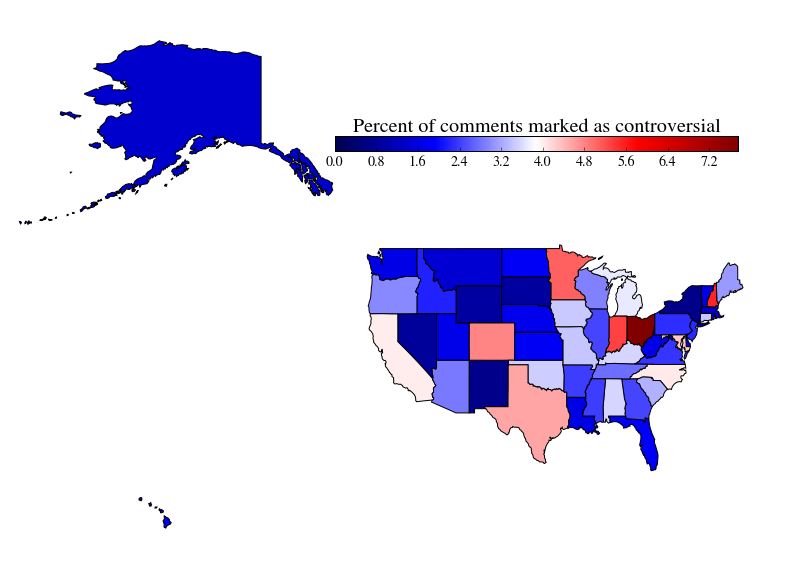

In [9]:
make_map(state_comment_df['Average Controversial Comment'], "Percent of comments marked as controversial");

Interesting but it looks like there may be some correlation between a state's population and the abundance of controversial comments seeing as Texas and California are pretty red. Also, something is certainly happening in Ohio.

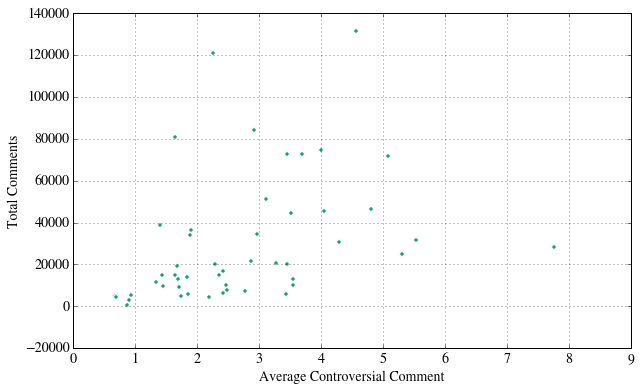

In [10]:
state_comment_df.plot(kind='scatter', x='Average Controversial Comment', y='Total Comments');

In [11]:
from scipy import stats
import numpy as np
x = state_comment_df['Average Controversial Comment']
y = state_comment_df['Total Comments']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [12]:
print "R squared equals " + str(r_value*r_value)

R squared equals 0.148034520875


Okay so the number of comments doesn't seem to correlate strongly with the abundance of controversial comments. Let's look at the states with the highest frequency of controversial comments. 

In [13]:
print "The states with the highest percentage of controversial comments:"
print "------------------------------------------------------------------"
print state_comment_df['Average Controversial Comment'].order(ascending=False)[:9]

The states with the highest percentage of controversial comments:
------------------------------------------------------------------
Ohio              7.751856
New Hampshire     5.538422
Indiana           5.310054
Minnesota         5.072937
Colorado          4.808376
Texas             4.569717
Maryland          4.289684
North Carolina    4.042121
California        4.004007
Name: Average Controversial Comment, dtype: float64


Something is clearly happening with Ohio. I'm wondering if there is just a higher background frequency of controversial comments or if they're happening all at once. A.K.A. the bury brigade. First I'll have to translate these unix codes to a real date. 

In [14]:
#translate the unix timecode to something I can understand
timelist = pd.to_datetime(state_comments['created_utc'], unit='s').tolist()
state_comments['created_utc'] = timelist

Now let's plot the cumulative summation of controversial comments. 

In [15]:
def create_cumsum(state_name, reddit_comments):
    '''creates a function that creates a cumulative summation of controversial posts'''
    state_comments = reddit_comments[reddit_comments['subreddit'] == state_name]
    state_comments = state_comments.sort(['created_utc'], ascending=True)
    state_cumsum = pd.Series(state_comments['controversiality'].tolist(), index=state_comments['created_utc'])
    state_cumsum = state_cumsum.cumsum()
    return state_cumsum

In [16]:
ohio_cumsum = create_cumsum('ohio', state_comments)
new_hampshire_cumsum = create_cumsum('newhampshire', state_comments)
colorado_cumsum = create_cumsum('newhampshire', state_comments)
texas_cumsum = create_cumsum('texas', state_comments)
maryland_cumsum = create_cumsum('maryland', state_comments)
indiana_cumsum = create_cumsum('indiana', state_comments)
minnesota_cumsum = create_cumsum('minnesota', state_comments)
nc_cumsum = create_cumsum('northcarolina', state_comments)
oklahoma_cumsum = create_cumsum('oklahoma', state_comments)

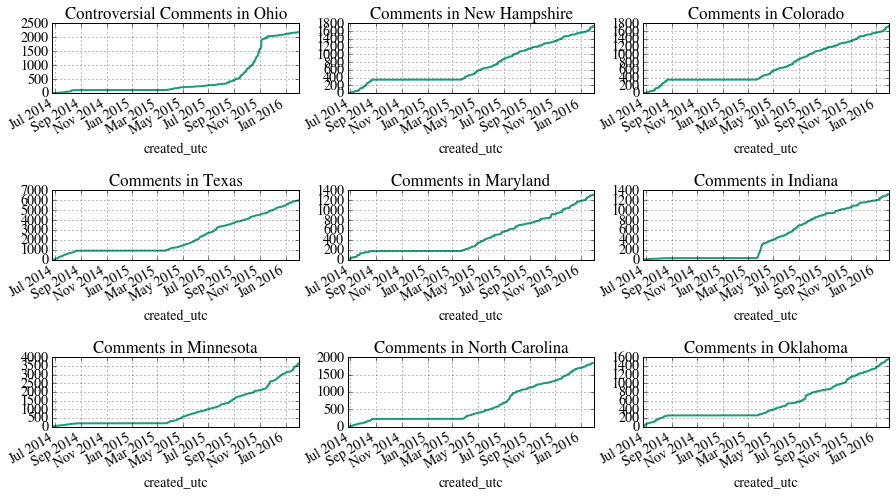

In [17]:
fig = plt.figure(figsize=(15,8), dpi=1600) 

ax1 = plt.subplot2grid((5,3),(0,0))
ohio_cumsum.plot()
plt.title("Controversial Comments in Ohio")

plt.subplot2grid((5,3),(0,1))
new_hampshire_cumsum.plot()
plt.title("Comments in New Hampshire")

plt.subplot2grid((5,3),(0,2))
colorado_cumsum.plot()
plt.title("Comments in Colorado")

plt.subplot2grid((5,3),(2,0))
texas_cumsum.plot()
plt.title("Comments in Texas")

plt.subplot2grid((5,3),(2,1))
maryland_cumsum.plot()
plt.title("Comments in Maryland")

plt.subplot2grid((5,3),(2,2))
indiana_cumsum.plot()
plt.title("Comments in Indiana")

plt.subplot2grid((5,3),(4,0))
minnesota_cumsum.plot()
plt.title("Comments in Minnesota")

plt.subplot2grid((5,3),(4,1))
nc_cumsum.plot()
plt.title("Comments in North Carolina")

plt.subplot2grid((5,3),(4,2))
oklahoma_cumsum.plot()
plt.title("Comments in Oklahoma")

So many of these look the same and Ohio looks quite different. I'll go back and look at the comments next but it appears that May 2015 seems to be where the actual number of controversial comments rises pretty sharply. This may be due to a boom in Reddit's overall population, the bury brigade (unlikely), or a change in Reddit's quantification of controversiality (haven't seen anything to substantiate this).

It looks like November was quite an 'interesting' month for Ohio and if it's true that controversial comments rise with the increasing population of Reddit, then this accumulation of controversial comments is much more than we'd expect by chance. My next update will include an analysis on these comments. 

Next, let's look at major city subreddits. 

### Adding major city subreddits

Below is a list of the biggest city subreddits along with the subreddits of the biggest city in each state. I'll do the same analysis for these. 

In [18]:
city_subreddit_names = ["austin","seattle","portland","boston","denver","sanfrancisco","sandiego","pittsburgh",
                   "chicago","washingtondc","baltimore","stlouis","atlanta","houston","philadelphia","losangeles",
                   "nyc","dallas","twincitiessocial","birmingham","anchorage","phoenix","newhaven","wilmington", 
                   "jacksonville","honolulu","boise","indianapolis","desmoines","wichita","louisville", 
                   "neworleans","portlandme","detroit","jackson","kansascity","billings","omaha","vegas", 
                   "manchester","newark","albuquerque","charlotte","fargo","columbus","okc","providence", 
                   "columbia","siouxfalls","memphis","saltlakecity","burlington","virginiabeach","charleston",
                   "milwaukee","cheyenne"]

In [21]:
city_comments = pd.read_csv('city_comments.csv')
print city_comments.columns

Index([u'subreddit', u'controversiality', u'created_utc'], dtype='object')


In [30]:
city_comment_df, city_comments = find_controversial_comments(city_comments, city_subreddit_names,
                                                             city_subreddit_names, 1403673915)

In [31]:
print "The cities with the highest percentage of controversial comments:"
print "------------------------------------------------------------------"
print city_comment_df['Average Controversial Comment'].order(ascending=False)[:9]

The cities with the highest percentage of controversial comments:
------------------------------------------------------------------
sanfrancisco    6.574897
baltimore       5.580586
chicago         4.554176
nyc             4.552405
seattle         4.376562
austin          3.980511
denver          3.956879
columbus        3.896225
portland        3.765909
Name: Average Controversial Comment, dtype: float64


Again, I'll have to investigate if subreddit size is correlated with the frequency of controversial comments. 

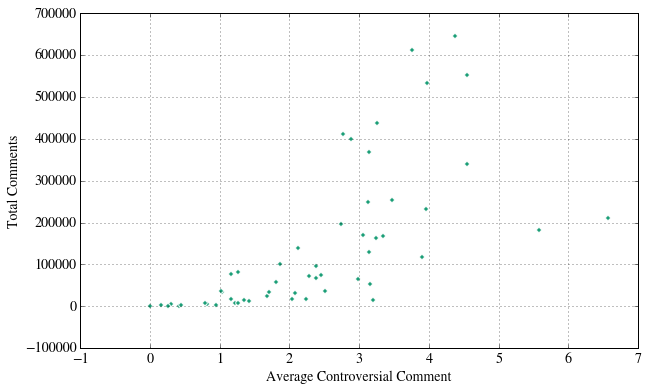

In [48]:
city_comment_df = city_comment_df.dropna()
city_comment_df.plot(kind='scatter', x='Average Controversial Comment', y='Total Comments');

In [49]:
x = city_comment_df['Average Controversial Comment']
y = city_comment_df['Total Comments']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print "R squared equals " + str(r_value*r_value)

R squared equals 0.453428754453


So this is a bit less convincing. I'll play with this data next to see if the very small subreddits are driving this trend. Because the controversiality score takes into account the number of upvotes in each thread, if this number is very low it may bias the data quite a bit. In short, it may not be fair to compare /r/sanfrancisco to /r/portlandme. 